In [68]:
import numpy as np
import pandas as pd
import keras 
import matplotlib.pyplot as plt


In [69]:
df= pd.read_csv("Google_Stock_Price_Train.csv")

In [70]:
training_set = df.iloc[:, 1:2].values

In [72]:
from sklearn.preprocessing import MinMaxScaler

sc= MinMaxScaler(feature_range= (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [80]:
x_train = []
y_train = []

for i in range(60, len(training_set_scaled)):
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)


In [90]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1198, 60, 1)

In [92]:
from keras.models import Sequential 
from keras.layers import Dense, LSTM, Dropout

In [97]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer= "adam", loss= "mean_squared_error")

In [100]:
regressor.fit(x_train, y_train, epochs= 100, batch_size =32, verbose= 1)

Epoch 1/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0054
Epoch 2/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0052
Epoch 3/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0049
Epoch 4/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0048
Epoch 5/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0042
Epoch 6/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0045
Epoch 7/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0042
Epoch 8/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0039
Epoch 9/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0036
Epoch 10/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0040
Epoch 11/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0041
Epoch 12/100
1198/1198 [==============================] - 7s 6ms/step - lo

1198/1198 [==============================] - 7s 6ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0017
Epoch 99/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0016
Epoch 100/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0014


In [107]:
test_dataset = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price = test_dataset.iloc[:, 1:2]

In [117]:
dataset_total = pd.concat((df["Open"], test_dataset["Open"]), axis= 0)
inputs = dataset_total[len(dataset_total)- len(test_dataset)- 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

x_test = []

for i in range(60,80):
    x_test.append(inputs[i-60: i])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

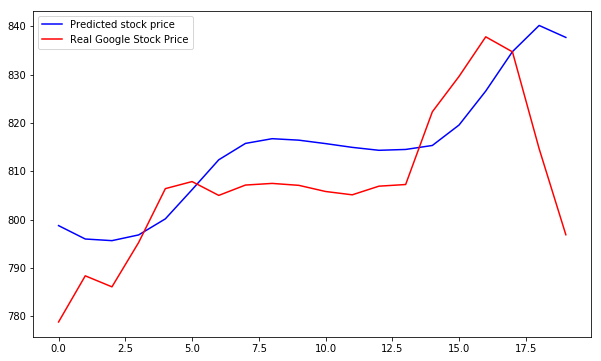

In [121]:
plt.figure(figsize= (10,6))
plt.plot(predicted_stock_price, color = "blue", label= "Predicted stock price")
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.legend()
plt.show()